<a href="https://colab.research.google.com/github/nattntn/DataPreparation_ForDeeptooth/blob/main/DentDiscovery/STEP1_Adjusted_upperCanine_sex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import shutil
from IPython.display import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Model, model_from_json
from tensorflow.keras.applications import EfficientNetB0

In [ ]:
#เชื่อม google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# data prepairation

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/Canine/Sex_UpperCanine_dataset_Ratio.csv')  #data ทำใหม่
print(df.shape)
df.head()

(762, 30)


,Unnamed: 0,img_path,tagName,originalImage,left,top,width,height,Rleft,Rtop,...,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,ratio_wh,ratio_Rwh,prob
0,0,/media/tohn/HDD/Natdata/Tooth_data/Data_Label/...,Upper Canine,https://irisprodseatraining.blob.core.windows....,445,192,34,113,0.725733,0.371091,...,1,Male,21.508780,22.0,0.999804,Male,1.0,0.300885,0.259015,0.999804
1,1,/media/tohn/HDD/Natdata/Tooth_data/Data_Label/...,Upper Canine,https://irisprodseatraining.blob.core.windows....,426,172,38,127,0.694788,0.333639,...,1,Male,21.929266,22.0,1.000000,Male,1.0,0.299213,0.259073,1.000000
2,2,/media/tohn/HDD/Natdata/Tooth_data/Data_Label/...,Upper Canine,https://irisprodseatraining.blob.core.windows....,408,203,37,114,0.665472,0.392326,...,1,Male,21.698683,22.0,0.999473,Male,1.0,0.324561,0.278771,0.999473
3,3,/media/tohn/HDD/Natdata/Tooth_data/Data_Label/...,Upper Canine,https://irisprodseatraining.blob.core.windows....,422,163,37,126,0.688274,0.316264,...,1,Male,21.557045,22.0,1.000000,Male,1.0,0.293651,0.254434,1.000000
4,4,/media/tohn/HDD/Natdata/Tooth_data/Data_Label/...,Upper Canine,https://irisprodseatraining.blob.core.windows....,398,194,43,154,0.649186,0.334294,...,1,Male,24.039991,24.0,0.999999,Male,1.0,0.279221,0.264214,0.999999


In [ ]:
df.columns

Index(['Unnamed: 0', 'img_path', 'tagName', 'originalImage', 'left', 'top',
       'width', 'height', 'Rleft', 'Rtop', 'Rwidth', 'Rheight', 'x_center',
       'y_center', 'FileName', 'Age(year)', 'Gender', 'Folder_type',
       'Folder_name', 'Path_Name', 'Gender_Class', 'Gender_Predict',
       'Age_predict', 'Age_predict_int', 'Gender_predict',
       'Gender_predict_str', 'Gender_predict_int', 'ratio_wh', 'ratio_Rwh',
       'prob'],
      dtype='object')

In [ ]:
df['Path_Name'] = df['Path_Name'].str.replace(
    '/media/data/Natdata/Tooth_data',
    '/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth',
    regex=False
)


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'img_path', 'originalImage'])

In [ ]:
df

,tagName,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,x_center,...,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,ratio_wh,ratio_Rwh,prob
0,Upper Canine,445,192,34,113,0.725733,0.371091,0.057003,0.220077,0.754235,...,1,Male,21.508780,22.0,0.999804,Male,1.0,0.300885,0.259015,0.999804
1,Upper Canine,426,172,38,127,0.694788,0.333639,0.063518,0.245174,0.726547,...,1,Male,21.929266,22.0,1.000000,Male,1.0,0.299213,0.259073,1.000000
2,Upper Canine,408,203,37,114,0.665472,0.392326,0.061889,0.222008,0.696417,...,1,Male,21.698683,22.0,0.999473,Male,1.0,0.324561,0.278771,0.999473
3,Upper Canine,422,163,37,126,0.688274,0.316264,0.061889,0.243243,0.719218,...,1,Male,21.557045,22.0,1.000000,Male,1.0,0.293651,0.254434,1.000000
4,Upper Canine,398,194,43,154,0.649186,0.334294,0.070033,0.265060,0.684202,...,1,Male,24.039991,24.0,0.999999,Male,1.0,0.279221,0.264214,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,Upper Canine,415,203,41,104,0.676873,0.392326,0.066775,0.202703,0.710261,...,0,Female,14.523476,15.0,0.042212,Female,0.0,0.394231,0.329425,0.042212
758,Upper Canine,417,231,33,102,0.680130,0.446380,0.053746,0.196911,0.707003,...,0,Female,14.887990,15.0,0.000024,Female,0.0,0.323529,0.272945,0.000024
759,Upper Canine,429,201,31,124,0.699674,0.389624,0.052117,0.239382,0.725733,...,0,Female,14.368689,14.0,0.003458,Female,0.0,0.250000,0.217716,0.003458
760,Upper Canine,429,194,34,104,0.699674,0.376110,0.057003,0.202703,0.728176,...,0,Female,16.072483,16.0,0.001527,Female,0.0,0.326923,0.281216,0.001527


In [ ]:
df.columns

Index(['tagName', 'left', 'top', 'width', 'height', 'Rleft', 'Rtop', 'Rwidth',
       'Rheight', 'x_center', 'y_center', 'FileName', 'Age(year)', 'Gender',
       'Folder_type', 'Folder_name', 'Path_Name', 'Gender_Class',
       'Gender_Predict', 'Age_predict', 'Age_predict_int', 'Gender_predict',
       'Gender_predict_str', 'Gender_predict_int', 'ratio_wh', 'ratio_Rwh',
       'prob'],
      dtype='object')

In [ ]:
# กำหนดชื่อคอลัมน์ที่ต้องการให้มาอยู่ต้นลำดับ
desired_columns = ['FileName', 'Age(year)', 'Gender','Path_Name','tagName']

# สร้างลำดับคอลัมน์ใหม่ โดยเอาคอลัมน์ที่ต้องการอยู่ก่อน แล้วตามด้วยคอลัมน์ที่เหลือ
df = df[desired_columns + [col for col in df.columns if col not in desired_columns]]
df

,FileName,Age(year),Gender,Path_Name,tagName,left,top,width,height,Rleft,...,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,ratio_wh,ratio_Rwh,prob
0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,445,192,34,113,0.725733,...,1,Male,21.508780,22.0,0.999804,Male,1.0,0.300885,0.259015,0.999804
1,J464.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,426,172,38,127,0.694788,...,1,Male,21.929266,22.0,1.000000,Male,1.0,0.299213,0.259073,1.000000
2,J463.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,408,203,37,114,0.665472,...,1,Male,21.698683,22.0,0.999473,Male,1.0,0.324561,0.278771,0.999473
3,J461.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,422,163,37,126,0.688274,...,1,Male,21.557045,22.0,1.000000,Male,1.0,0.293651,0.254434,1.000000
4,J460.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,398,194,43,154,0.649186,...,1,Male,24.039991,24.0,0.999999,Male,1.0,0.279221,0.264214,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,B162.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,415,203,41,104,0.676873,...,0,Female,14.523476,15.0,0.042212,Female,0.0,0.394231,0.329425,0.042212
758,B175.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,417,231,33,102,0.680130,...,0,Female,14.887990,15.0,0.000024,Female,0.0,0.323529,0.272945,0.000024
759,B148.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,429,201,31,124,0.699674,...,0,Female,14.368689,14.0,0.003458,Female,0.0,0.250000,0.217716,0.003458
760,B158.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,429,194,34,104,0.699674,...,0,Female,16.072483,16.0,0.001527,Female,0.0,0.326923,0.281216,0.001527


In [ ]:
df = df.drop(columns=['ratio_wh', 'ratio_Rwh'])
df

,FileName,Age(year),Gender,Path_Name,tagName,left,top,width,height,Rleft,...,Folder_type,Folder_name,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,445,192,34,113,0.725733,...,Normal,Both,1,Male,21.508780,22.0,0.999804,Male,1.0,0.999804
1,J464.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,426,172,38,127,0.694788,...,Normal,Both,1,Male,21.929266,22.0,1.000000,Male,1.0,1.000000
2,J463.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,408,203,37,114,0.665472,...,Normal,Both,1,Male,21.698683,22.0,0.999473,Male,1.0,0.999473
3,J461.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,422,163,37,126,0.688274,...,Normal,Both,1,Male,21.557045,22.0,1.000000,Male,1.0,1.000000
4,J460.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,398,194,43,154,0.649186,...,Normal,Both,1,Male,24.039991,24.0,0.999999,Male,1.0,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,B162.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,415,203,41,104,0.676873,...,Normal,Both,0,Female,14.523476,15.0,0.042212,Female,0.0,0.042212
758,B175.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,417,231,33,102,0.680130,...,Normal,Both,0,Female,14.887990,15.0,0.000024,Female,0.0,0.000024
759,B148.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,429,201,31,124,0.699674,...,Normal,Both,0,Female,14.368689,14.0,0.003458,Female,0.0,0.003458
760,B158.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,429,194,34,104,0.699674,...,Normal,Both,0,Female,16.072483,16.0,0.001527,Female,0.0,0.001527


In [ ]:
df['real_ratio_hw'] = df['height']/df['width']
df

,FileName,Age(year),Gender,Path_Name,tagName,left,top,width,height,Rleft,...,Folder_name,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob,real_ratio_hw
0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,445,192,34,113,0.725733,...,Both,1,Male,21.508780,22.0,0.999804,Male,1.0,0.999804,3.323529
1,J464.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,426,172,38,127,0.694788,...,Both,1,Male,21.929266,22.0,1.000000,Male,1.0,1.000000,3.342105
2,J463.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,408,203,37,114,0.665472,...,Both,1,Male,21.698683,22.0,0.999473,Male,1.0,0.999473,3.081081
3,J461.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,422,163,37,126,0.688274,...,Both,1,Male,21.557045,22.0,1.000000,Male,1.0,1.000000,3.405405
4,J460.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,398,194,43,154,0.649186,...,Both,1,Male,24.039991,24.0,0.999999,Male,1.0,0.999999,3.581395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,B162.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,415,203,41,104,0.676873,...,Both,0,Female,14.523476,15.0,0.042212,Female,0.0,0.042212,2.536585
758,B175.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,417,231,33,102,0.680130,...,Both,0,Female,14.887990,15.0,0.000024,Female,0.0,0.000024,3.090909
759,B148.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,429,201,31,124,0.699674,...,Both,0,Female,14.368689,14.0,0.003458,Female,0.0,0.003458,4.000000
760,B158.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,429,194,34,104,0.699674,...,Both,0,Female,16.072483,16.0,0.001527,Female,0.0,0.001527,3.058824


In [ ]:
df.to_csv('/content/gdrive/MyDrive/DentDiscovering/Canine/Sex_UpperCanine_dataset_Ratio.csv', index=False)

# data adjusting X all prediction


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/Canine/Sex_UpperCanine_dataset_Ratio.csv')  #data ทำใหม่
print(df.shape)
df.head()

(762, 26)


,FileName,Age(year),Gender,Path_Name,tagName,left,top,width,height,Rleft,...,Folder_name,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob,real_ratio_hw
0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,445,192,34,113,0.725733,...,Both,1,Male,21.508780,22.0,0.999804,Male,1.0,0.999804,3.323529
1,J464.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,426,172,38,127,0.694788,...,Both,1,Male,21.929266,22.0,1.000000,Male,1.0,1.000000,3.342105
2,J463.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,408,203,37,114,0.665472,...,Both,1,Male,21.698683,22.0,0.999473,Male,1.0,0.999473,3.081081
3,J461.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,422,163,37,126,0.688274,...,Both,1,Male,21.557045,22.0,1.000000,Male,1.0,1.000000,3.405405
4,J460.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,398,194,43,154,0.649186,...,Both,1,Male,24.039991,24.0,0.999999,Male,1.0,0.999999,3.581395


## def

In [ ]:
from PIL import Image

def enlarge_tooth_region(image, x_center, y_center, width, height, scale_x=1.0, scale_y=1.0):
    """
    ขยายความกว้างและสูงของบริเวณฟันกรามซี่ที่ 3 บนในภาพถ่ายรังสีพาโนรามา

    Parameters:
    image (PIL Image): ภาพถ่ายรังสีพาโนรามา
    x_center, y_center (float): พิกัดศูนย์กลางของบริเวณที่ต้องการขยาย (0-1)
    width, height (float): ความกว้างและความสูงของบริเวณที่ต้องการขยาย (0-1)
    scale_x, scale_y (float): ค่าการขยายความกว้างและความสูง

    Returns:
    result_image (PIL Image): ภาพที่ถูกปรับขนาดเรียบร้อยแล้ว
    """
    # ขนาดภาพ
    img_width, img_height = image.size

    # คำนวณพิกัดจริง   --> ความจริงควรหา code ที่คำนวณพิกัดจริง ๆ มาเลย
    w = int(width * img_width)
    h = int(height * img_height)
    x = int((x_center * img_width) - (w / 2))
    y = int((y_center * img_height) - (h / 2))

    # ตรวจสอบว่าพิกัดอยู่ภายในขอบเขตของภาพ
    x = max(0, x)
    y = max(0, y)
    x2 = min(img_width, x + w)
    y2 = min(img_height, y + h)

    # แยกบริเวณที่ต้องการขยาย
    roi = image.crop((x, y, x2, y2))

    # คำนวณขนาดใหม่หลังจากการขยาย
    new_width = int(w * scale_x)
    new_height = int(h * scale_y)

    # ขยายขนาดบริเวณที่ต้องการ
    resized_roi = roi.resize((new_width, new_height), Image.LANCZOS)

    # คำนวณพิกัดใหม่หลังจากการขยาย
    new_x = x - (new_width - w) // 2
    new_y = y - (new_height - h) // 2

    # ตรวจสอบว่าพิกัดใหม่อยู่ภายในขอบเขตของภาพ
    new_x_ = max(0, new_x)
    new_y_ = max(0, new_y)
    new_width_ = min(img_width, new_x + new_width) #width
    new_height_ = min(img_height, new_y + new_height)

    # สร้างสำเนาของภาพเดิมเพื่อไม่ให้แก้ไขภาพต้นฉบับ
    result_image = image.copy()

    # รวมบริเวณที่ขยายกลับเข้ากับภาพเดิม
    result_image.paste(resized_roi, (new_x, new_y))

    return result_image,new_x,new_y,new_width,new_height

In [ ]:
def generate_numbers(start_neg, stop_neg, start_pos, stop_pos, step):
    negative_numbers = [round(x, 2) for x in np.arange(start_neg, stop_neg, -step)]
    positive_numbers = [1.0] + [round(x, 2) for x in np.arange(start_pos, stop_pos, -step)]
    return negative_numbers + positive_numbers

In [ ]:
numbers = generate_numbers(start_neg=0.95, stop_neg=0.74, start_pos=1.25, stop_pos=1.04, step=0.01)

# Print the generated numbers
print(numbers)
print(len(numbers))

[0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 1.0, 1.25, 1.24, 1.23, 1.22, 1.21, 1.2, 1.19, 1.18, 1.17, 1.16, 1.15, 1.14, 1.13, 1.12, 1.11, 1.1, 1.09, 1.08, 1.07, 1.06, 1.05]
43


## model

In [ ]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
#ดึงข้อมูลใน Github มาใช้
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/


/content
/content/efficientnet_keras_transfer_learning


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import sys
sys.path.append('/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})


In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Model/Multi_task(Age)(7-25)/16_Multi_8e-6_250_Unfreeze.h5")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 32)         128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 swish (Swish)               (None, 112, 112, 32)         0         ['batch_normalization[0][0

In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [ ]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path,model, height, width):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])

    return result

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/')
# !mkdir adjusting_x
# !mkdir adjusting_y
# !mkdir adjusting_xy

In [ ]:
# os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/adjusting_x/')
# !mkdir image_adjusted


In [ ]:
df

,FileName,Age(year),Gender,Path_Name,tagName,left,top,width,height,Rleft,...,Folder_name,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob,real_ratio_hw
0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,445,192,34,113,0.725733,...,Both,1,Male,21.508780,22.0,0.999804,Male,1.0,0.999804,3.323529
1,J464.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,426,172,38,127,0.694788,...,Both,1,Male,21.929266,22.0,1.000000,Male,1.0,1.000000,3.342105
2,J463.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,408,203,37,114,0.665472,...,Both,1,Male,21.698683,22.0,0.999473,Male,1.0,0.999473,3.081081
3,J461.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,422,163,37,126,0.688274,...,Both,1,Male,21.557045,22.0,1.000000,Male,1.0,1.000000,3.405405
4,J460.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,398,194,43,154,0.649186,...,Both,1,Male,24.039991,24.0,0.999999,Male,1.0,0.999999,3.581395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,B162.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,415,203,41,104,0.676873,...,Both,0,Female,14.523476,15.0,0.042212,Female,0.0,0.042212,2.536585
758,B175.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,417,231,33,102,0.680130,...,Both,0,Female,14.887990,15.0,0.000024,Female,0.0,0.000024,3.090909
759,B148.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,429,201,31,124,0.699674,...,Both,0,Female,14.368689,14.0,0.003458,Female,0.0,0.003458,4.000000
760,B158.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,429,194,34,104,0.699674,...,Both,0,Female,16.072483,16.0,0.001527,Female,0.0,0.001527,3.058824


In [ ]:
# ตัวอย่างการเรียกใช้ฟังก์ชัน
scale_x = numbers

dataframe = []
# list_df = [] #keep


for i in range(len(df)):
    image_array = cv2.imread(df['Path_Name'][i]) # data type = array
    image = Image.fromarray(image_array.astype('uint8')) # change array  to PIL.Image.Image type

    # ข้อมูลพิกัดจาก Custom Vision (สมมติ)
    width = df['Rwidth'][i]
    height = df['Rheight'][i]
    x_center = df['x_center'][i]
    y_center = df['y_center'][i]

    for number in scale_x:
        result_image = enlarge_tooth_region(image, x_center, y_center, width, height, scale_x= number)
        path_name = df['Path_Name'][i]
        filename = df['Path_Name'][i].split("/")[-1]
        gender = df['Path_Name'][i].split("/")[-3]
        age =  df['Path_Name'][i].split("/")[-4].split("Y")[0]
        number = number
        image_path = f"/content/gdrive/MyDrive/DentDiscovering/Canine/adjusting_x/image_adjusted/adjust_x_{number}_{filename}"
        # print(image_path)
        # Save image
        result_image[0].save(image_path)

        # Prepare DataFrame for storing results
        df_aff = pd.DataFrame({
            'FileName': [filename],
            'age(year)': [age],
            'gender': [gender],
            'path_name_ori': [df['Path_Name'][i]],
            'x_ori': [df['left'][i]],
            'y_ori': [df['top'][i]],
            'width_ori': [df['width'][i]],
            'height_ori': [df['height'][i]],
            'scale_x':[number],
            'scale_y':[1.00],
            'filename_adj': [image_path.split("/")[-1]],
            'path_name_adj': [image_path],
            'x_adj': [result_image[1]],
            'y_adj': [result_image[2]],
            'width_adj': [result_image[3]],
            'height_adj': [result_image[4]]
        })

        dataframe.append(df_aff)  # Append to the list

# Combine all individual DataFrames into one
result_x = pd.concat(dataframe, ignore_index=True)

result_x

,filename,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,scale_y,filename_adj,path_name_adj,x_adj,y_adj,width_adj,height_adj
0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.95,1.0,adjust_x_0.95_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,447,192,32,113
1,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.94,1.0,adjust_x_0.94_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,448,192,31,113
2,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.93,1.0,adjust_x_0.93_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,448,192,31,113
3,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.92,1.0,adjust_x_0.92_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,448,192,31,113
4,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.91,1.0,adjust_x_0.91_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,448,192,30,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32761,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.09,1.0,adjust_x_1.09_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,415,226,37,93
32762,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.08,1.0,adjust_x_1.08_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,415,226,36,93
32763,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.07,1.0,adjust_x_1.07_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,415,226,36,93
32764,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.06,1.0,adjust_x_1.06_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,415,226,36,93


In [ ]:
result_x = result_x.rename(columns={'filename': 'FileName'})

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/')
result_x.to_csv('data_scale_x.csv')

## predict

In [ ]:
result_x = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/Canine/data_scale_x.csv')  #data ทำใหม่
print(result_x.shape)
result_x.head()

(32766, 17)


,Unnamed: 0,FileName,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,scale_y,filename_adj,path_name_adj,x_adj,y_adj,width_adj,height_adj
0,0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.95,1.0,adjust_x_0.95_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,447,192,32,113
1,1,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.94,1.0,adjust_x_0.94_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,448,192,31,113
2,2,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.93,1.0,adjust_x_0.93_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,448,192,31,113
3,3,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.92,1.0,adjust_x_0.92_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,448,192,31,113
4,4,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.91,1.0,adjust_x_0.91_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,448,192,30,113


In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [ ]:
# Predict for each image in the test dataset
from keras.preprocessing import image
from keras.preprocessing import image
import keras.utils as image

pred_list_regression = []  # Store regression results
pred_list_classification = []  # Store binary classification results

img_path = result_x['path_name_adj'].tolist()

for i in range(len(img_path)):
    predictions = predict_image(img_path[i], model, height, width)

    # Access the regression result (output 0)
    regression_result = predictions[0]

    # Access the classification result (output 1)
    classification_result = predictions[1] # Use a threshold to determine the class

    pred_list_regression.append(regression_result)
    pred_list_classification.append(classification_result)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
1/1 [==============================] - 0s 57ms/step


## Age Estination

In [ ]:
list_Regression_predict = []
for i in pred_list_regression:
  i = i[0][0]
  list_Regression_predict.append(i)

In [ ]:
age_predict = np.around(list_Regression_predict).astype(int) # array+int
age_predict

array([22, 22, 22, ..., 17, 17, 17])

## Gender Prediction

In [ ]:
list_Classification_predict = []
for i in pred_list_classification:
  i = i[0][0]
  list_Classification_predict.append(i)

In [ ]:
gender_predict_str = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_str = np.append(gender_predict_str, 'Male')
    else:
        gender_predict_str = np.append(gender_predict_str, 'Female')

# แสดงผลลัพธ์
print(gender_predict_str)

['Male' 'Male' 'Male' ... 'Female' 'Female' 'Female']


In [ ]:
gender_predict_int = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_int = np.append(gender_predict_int, 1).astype(int)
    else:
        gender_predict_int = np.append(gender_predict_int, 0).astype(int)

# แสดงผลลัพธ์
print(gender_predict_int)

[1 1 1 ... 0 0 0]


In [ ]:
len(gender_predict_int)

32766

In [ ]:
result_x.columns

Index(['Unnamed: 0', 'FileName', 'age(year)', 'gender', 'path_name_ori',
       'x_ori', 'y_ori', 'width_ori', 'height_ori', 'scale_x', 'scale_y',
       'filename_adj', 'path_name_adj', 'x_adj', 'y_adj', 'width_adj',
       'height_adj'],
      dtype='object')

In [ ]:
result_x['gender'] = result_x['gender'].replace({'F': 'Female', 'M': 'Male'})

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

gender_predict_str
act_gender_str = np.array(result_x['gender'].tolist())

cmat = confusion_matrix(act_gender_str, gender_predict_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_gender_str, gender_predict_str))#performance

classifier accuracy = 86.83391320271012%
              precision    recall  f1-score   support

      Female       0.82      0.85      0.83     12771
        Male       0.90      0.88      0.89     19995

    accuracy                           0.87     32766
   macro avg       0.86      0.87      0.86     32766
weighted avg       0.87      0.87      0.87     32766



Text(0.5, 76.24999999999999, 'Predicted label')

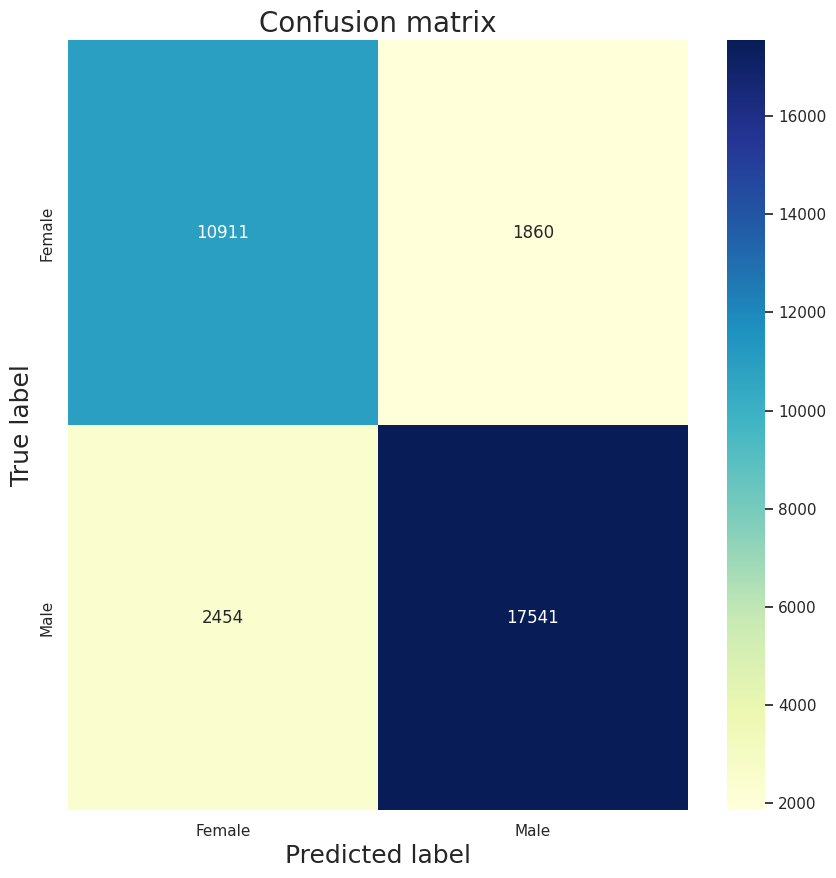

In [ ]:
#create CF
data = {'Actual': act_gender_str,'Predicted' : gender_predict_str}
df_1 = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df_1['Actual'],df_1['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_gender_str, gender_predict_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## รวมตาราง

In [ ]:
result_x.head()

,Unnamed: 0,FileName,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,...,x_adj,y_adj,width_adj,height_adj,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob
0,0,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.95,...,447,192,32,113,21.549318,22,0.999808,Male,1,0.999808
1,1,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.94,...,448,192,31,113,21.541183,22,0.999848,Male,1,0.999848
2,2,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.93,...,448,192,31,113,21.541183,22,0.999848,Male,1,0.999848
3,3,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.92,...,448,192,31,113,21.541183,22,0.999848,Male,1,0.999848
4,4,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.91,...,448,192,30,113,21.571314,22,0.999690,Male,1,0.999690


In [ ]:
#Regression
result_x['Age_predict'] = list_Regression_predict # ผลที่ทำนาย
result_x['Age_predict_int'] = age_predict

In [ ]:
result_x['Gender_predict'] = list_Classification_predict #'.format # ผลที่ทำนาย
# df['Gender_predict'] = df['Gender_predict'].apply(lambda x: f'{x:.8f}') #'.format # ผลที่ทำนาย
result_x['Gender_predict_str'] = gender_predict_str
result_x['Gender_predict_int'] = gender_predict_int

In [ ]:
result_x['prob'] = result_x['Gender_predict']

In [ ]:
result_x['adj_ratio_hw'] = result_x['height_adj']/result_x['width_adj']

In [ ]:
print(result_x.shape)
result_x.head()

(32766, 24)


,Unnamed: 0,FileName,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,...,y_adj,width_adj,height_adj,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob,adj_ratio_hw
0,0,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.95,...,192,32,113,21.549318,22,0.999808,Male,1,0.999808,3.531250
1,1,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.94,...,192,31,113,21.541183,22,0.999848,Male,1,0.999848,3.645161
2,2,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.93,...,192,31,113,21.541183,22,0.999848,Male,1,0.999848,3.645161
3,3,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.92,...,192,31,113,21.541183,22,0.999848,Male,1,0.999848,3.645161
4,4,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,0.91,...,192,30,113,21.571314,22,0.999690,Male,1,0.999690,3.766667


In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/')
result_x.to_csv('predict_data_scale_x.csv')

# data adjusting Y all prediction


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/Canine/Sex_UpperCanine_dataset_Ratio.csv')  #data ทำใหม่
print(df.shape)
df.head()

(762, 26)


,FileName,Age(year),Gender,Path_Name,tagName,left,top,width,height,Rleft,...,Folder_name,Gender_Class,Gender_Predict,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob,real_ratio_hw
0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,445,192,34,113,0.725733,...,Both,1,Male,21.508780,22.0,0.999804,Male,1.0,0.999804,3.323529
1,J464.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,426,172,38,127,0.694788,...,Both,1,Male,21.929266,22.0,1.000000,Male,1.0,1.000000,3.342105
2,J463.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,408,203,37,114,0.665472,...,Both,1,Male,21.698683,22.0,0.999473,Male,1.0,0.999473,3.081081
3,J461.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,422,163,37,126,0.688274,...,Both,1,Male,21.557045,22.0,1.000000,Male,1.0,1.000000,3.405405
4,J460.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,Upper Canine,398,194,43,154,0.649186,...,Both,1,Male,24.039991,24.0,0.999999,Male,1.0,0.999999,3.581395


## def

In [ ]:
from PIL import Image

def enlarge_tooth_region(image, x_center, y_center, width, height, scale_x=1.0, scale_y=1.0):
    """
    ขยายความกว้างและสูงของบริเวณฟันกรามซี่ที่ 3 บนในภาพถ่ายรังสีพาโนรามา

    Parameters:
    image (PIL Image): ภาพถ่ายรังสีพาโนรามา
    x_center, y_center (float): พิกัดศูนย์กลางของบริเวณที่ต้องการขยาย (0-1)
    width, height (float): ความกว้างและความสูงของบริเวณที่ต้องการขยาย (0-1)
    scale_x, scale_y (float): ค่าการขยายความกว้างและความสูง

    Returns:
    result_image (PIL Image): ภาพที่ถูกปรับขนาดเรียบร้อยแล้ว
    """
    # ขนาดภาพ
    img_width, img_height = image.size

    # คำนวณพิกัดจริง   --> ความจริงควรหา code ที่คำนวณพิกัดจริง ๆ มาเลย
    w = int(width * img_width)
    h = int(height * img_height)
    x = int((x_center * img_width) - (w / 2))
    y = int((y_center * img_height) - (h / 2))

    # ตรวจสอบว่าพิกัดอยู่ภายในขอบเขตของภาพ
    x = max(0, x)
    y = max(0, y)
    x2 = min(img_width, x + w)
    y2 = min(img_height, y + h)

    # แยกบริเวณที่ต้องการขยาย
    roi = image.crop((x, y, x2, y2))

    # คำนวณขนาดใหม่หลังจากการขยาย
    new_width = int(w * scale_x)
    new_height = int(h * scale_y)

    # ขยายขนาดบริเวณที่ต้องการ
    resized_roi = roi.resize((new_width, new_height), Image.LANCZOS)

    # คำนวณพิกัดใหม่หลังจากการขยาย
    new_x = x - (new_width - w) // 2
    new_y = y - (new_height - h) // 2

    # ตรวจสอบว่าพิกัดใหม่อยู่ภายในขอบเขตของภาพ
    new_x_ = max(0, new_x)
    new_y_ = max(0, new_y)
    new_width_ = min(img_width, new_x + new_width) #width
    new_height_ = min(img_height, new_y + new_height)

    # สร้างสำเนาของภาพเดิมเพื่อไม่ให้แก้ไขภาพต้นฉบับ
    result_image = image.copy()

    # รวมบริเวณที่ขยายกลับเข้ากับภาพเดิม
    result_image.paste(resized_roi, (new_x, new_y))

    return result_image,new_x,new_y,new_width,new_height

In [ ]:
def generate_numbers(start_neg, stop_neg, start_pos, stop_pos, step):
    negative_numbers = [round(x, 2) for x in np.arange(start_neg, stop_neg, -step)]
    positive_numbers = [1.0] + [round(x, 2) for x in np.arange(start_pos, stop_pos, -step)]
    return negative_numbers + positive_numbers

In [ ]:
numbers = generate_numbers(start_neg=0.95, stop_neg=0.74, start_pos=1.25, stop_pos=1.04, step=0.01)

# Print the generated numbers
print(numbers)
print(len(numbers))

[0.95, 0.94, 0.93, 0.92, 0.91, 0.9, 0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8, 0.79, 0.78, 0.77, 0.76, 0.75, 1.0, 1.25, 1.24, 1.23, 1.22, 1.21, 1.2, 1.19, 1.18, 1.17, 1.16, 1.15, 1.14, 1.13, 1.12, 1.11, 1.1, 1.09, 1.08, 1.07, 1.06, 1.05]
43


In [ ]:
# ตัวอย่างการเรียกใช้ฟังก์ชัน
scale_y = numbers

dataframe = []
# list_df = [] #keep


for i in range(len(df)):
    image_array = cv2.imread(df['Path_Name'][i]) # data type = array
    image = Image.fromarray(image_array.astype('uint8')) # change array  to PIL.Image.Image type

    # ข้อมูลพิกัดจาก Custom Vision (สมมติ)
    width = df['Rwidth'][i]
    height = df['Rheight'][i]
    x_center = df['x_center'][i]
    y_center = df['y_center'][i]

    for number in scale_y:
        result_image = enlarge_tooth_region(image, x_center, y_center, width, height, scale_y= number)
        path_name = df['Path_Name'][i]
        filename = df['Path_Name'][i].split("/")[-1]
        gender = df['Path_Name'][i].split("/")[-3]
        age =  df['Path_Name'][i].split("/")[-4].split("Y")[0]
        number = number
        image_path = f"/content/gdrive/MyDrive/DentDiscovering/Canine/adjusting_y/image_adjusted/adjust_y_{number}_{filename}"
        # print(image_path)
        # Save image
        result_image[0].save(image_path)

        # Prepare DataFrame for storing results
        df_aff = pd.DataFrame({
            'FileName': [filename],
            'age(year)': [age],
            'gender': [gender],
            'path_name_ori': [df['Path_Name'][i]],
            'x_ori': [df['left'][i]],
            'y_ori': [df['top'][i]],
            'width_ori': [df['width'][i]],
            'height_ori': [df['height'][i]],
            'scale_x':[1.00],
            'scale_y':[number],
            'filename_adj': [image_path.split("/")[-1]],
            'path_name_adj': [image_path],
            'x_adj': [result_image[1]],
            'y_adj': [result_image[2]],
            'width_adj': [result_image[3]],
            'height_adj': [result_image[4]]
        })

        dataframe.append(df_aff)  # Append to the list

# Combine all individual DataFrames into one
result_y = pd.concat(dataframe, ignore_index=True)

result_y

KeyboardInterrupt: 

In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/')
result_y.to_csv('data_scale_y.csv')

## predict

In [ ]:
result_y = pd.read_csv('/content/gdrive/MyDrive/DentDiscovering/Canine/data_scale_y.csv')  #data ทำใหม่
print(result_y.shape)
result_y.head()

(32766, 17)


,Unnamed: 0,FileName,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,scale_y,filename_adj,path_name_adj,x_adj,y_adj,width_adj,height_adj
0,0,J465.jpg,M,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.95,adjust_y_0.95_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,195,34,107
1,1,J465.jpg,M,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.94,adjust_y_0.94_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,196,34,106
2,2,J465.jpg,M,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.93,adjust_y_0.93_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,196,34,105
3,3,J465.jpg,M,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.92,adjust_y_0.92_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,197,34,103
4,4,J465.jpg,M,Both,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.91,adjust_y_0.91_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,198,34,102


In [ ]:
result_y['path_name_ori'][0]

'/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_tooth/Data_Cut_images/Test/Normal/25Y/M/Both/J465.jpg'

In [ ]:
ages = []
genders = []

# Loop through each path in the column
for path in result_y['path_name_ori']:
    age = path.split('/')[-4].split("Y")[0]  # Change -2 if age is in another position
    gender = path.split('/')[-3]
    ages.append(age)
    genders.append(gender)

# Add the extracted ages to the dataframe as a new column
result_y['age(year)'] = ages
result_y['gender'] = genders

In [ ]:
result_y

,Unnamed: 0,FileName,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,scale_y,filename_adj,path_name_adj,x_adj,y_adj,width_adj,height_adj
0,0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.95,adjust_y_0.95_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,195,34,107
1,1,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.94,adjust_y_0.94_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,196,34,106
2,2,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.93,adjust_y_0.93_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,196,34,105
3,3,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.92,adjust_y_0.92_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,197,34,103
4,4,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.91,adjust_y_0.91_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,198,34,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32761,32761,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.09,adjust_y_1.09_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,222,34,101
32762,32762,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.08,adjust_y_1.08_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,223,34,100
32763,32763,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.07,adjust_y_1.07_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,223,34,99
32764,32764,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.06,adjust_y_1.06_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,224,34,98


In [ ]:
height = width = model.input_shape[1]
print(f"height: {height}, width: {width}")

height: 224, width: 224


In [ ]:
# Predict for each image in the test dataset
from keras.preprocessing import image
from keras.preprocessing import image
import keras.utils as image

pred_list_regression = []  # Store regression results
pred_list_classification = []  # Store binary classification results

img_path = result_y['path_name_adj'].tolist()

for i in range(len(img_path)):
    predictions = predict_image(img_path[i], model, height, width)

    # Access the regression result (output 0)
    regression_result = predictions[0]

    # Access the classification result (output 1)
    classification_result = predictions[1] # Use a threshold to determine the class

    pred_list_regression.append(regression_result)
    pred_list_classification.append(classification_result)

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
1/1 [==============================] - 0s 25ms/step


## Age Estination

In [ ]:
list_Regression_predict = []
for i in pred_list_regression:
  i = i[0][0]
  list_Regression_predict.append(i)

In [ ]:
age_predict = np.around(list_Regression_predict).astype(int) # array+int
age_predict

array([22, 22, 21, ..., 17, 17, 17])

## Gender Prediction

In [ ]:
list_Classification_predict = []
for i in pred_list_classification:
  i = i[0][0]
  list_Classification_predict.append(i)

In [ ]:
gender_predict_str = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_str = np.append(gender_predict_str, 'Male')
    else:
        gender_predict_str = np.append(gender_predict_str, 'Female')

# แสดงผลลัพธ์
print(gender_predict_str)

['Male' 'Male' 'Male' ... 'Female' 'Female' 'Female']


In [ ]:
gender_predict_int = []
# ใช้ลูป for เพื่อแปลงค่าและเพิ่มเข้าใน NumPy array
for value in list_Classification_predict:
    if value >= 0.5:
        gender_predict_int = np.append(gender_predict_int, 1).astype(int)
    else:
        gender_predict_int = np.append(gender_predict_int, 0).astype(int)

# แสดงผลลัพธ์
print(gender_predict_int)

[1 1 1 ... 0 0 0]


In [ ]:
len(gender_predict_int)

32766

In [ ]:
result_y

,Unnamed: 0,FileName,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,scale_y,filename_adj,path_name_adj,x_adj,y_adj,width_adj,height_adj
0,0,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.95,adjust_y_0.95_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,195,34,107
1,1,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.94,adjust_y_0.94_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,196,34,106
2,2,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.93,adjust_y_0.93_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,196,34,105
3,3,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.92,adjust_y_0.92_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,197,34,103
4,4,J465.jpg,25,M,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.91,adjust_y_0.91_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,198,34,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32761,32761,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.09,adjust_y_1.09_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,222,34,101
32762,32762,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.08,adjust_y_1.08_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,223,34,100
32763,32763,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.07,adjust_y_1.07_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,223,34,99
32764,32764,B154.jpg,15,F,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.06,adjust_y_1.06_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,224,34,98


In [ ]:
result_y['gender'] = result_y['gender'].replace({'F': 'Female', 'M': 'Male'})

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

gender_predict_str
act_gender_str = np.array(result_y['gender'].tolist())

cmat = confusion_matrix(act_gender_str, gender_predict_str)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act_gender_str, gender_predict_str))#performance

classifier accuracy = 86.75456265641213%
              precision    recall  f1-score   support

      Female       0.82      0.85      0.83     12771
        Male       0.90      0.88      0.89     19995

    accuracy                           0.87     32766
   macro avg       0.86      0.86      0.86     32766
weighted avg       0.87      0.87      0.87     32766



Text(0.5, 76.24999999999999, 'Predicted label')

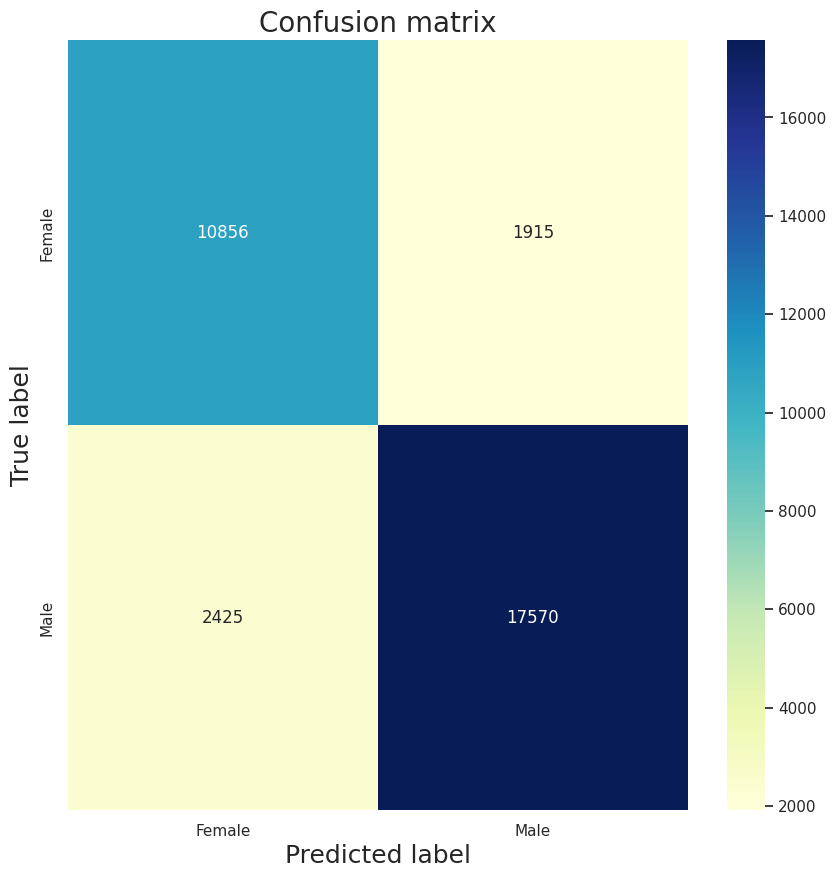

In [ ]:
#create CF
data = {'Actual': act_gender_str,'Predicted' : gender_predict_str}
df_1 = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df_1['Actual'],df_1['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act_gender_str, gender_predict_str)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

## รวมตาราง

In [ ]:
result_y

,Unnamed: 0,FileName,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,scale_y,filename_adj,path_name_adj,x_adj,y_adj,width_adj,height_adj
0,0,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.95,adjust_y_0.95_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,195,34,107
1,1,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.94,adjust_y_0.94_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,196,34,106
2,2,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.93,adjust_y_0.93_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,196,34,105
3,3,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.92,adjust_y_0.92_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,197,34,103
4,4,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,0.91,adjust_y_0.91_J465.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,446,198,34,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32761,32761,B154.jpg,15,Female,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.09,adjust_y_1.09_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,222,34,101
32762,32762,B154.jpg,15,Female,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.08,adjust_y_1.08_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,223,34,100
32763,32763,B154.jpg,15,Female,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.07,adjust_y_1.07_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,223,34,99
32764,32764,B154.jpg,15,Female,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,416,226,34,93,1.0,1.06,adjust_y_1.06_B154.jpg,/content/gdrive/MyDrive/DentDiscovering/Canine...,416,224,34,98


In [ ]:
#Regression
result_y['Age_predict'] = list_Regression_predict # ผลที่ทำนาย
result_y['Age_predict_int'] = age_predict

In [ ]:
result_y['Gender_predict'] = list_Classification_predict #'.format # ผลที่ทำนาย
# df['Gender_predict'] = df['Gender_predict'].apply(lambda x: f'{x:.8f}') #'.format # ผลที่ทำนาย
result_y['Gender_predict_str'] = gender_predict_str
result_y['Gender_predict_int'] = gender_predict_int

In [ ]:
result_y['prob'] = result_y['Gender_predict']

In [ ]:
result_y['adj_ratio_hw'] = result_y['height_adj']/result_y['width_adj']

In [ ]:
print(result_y.shape)
result_y.head()

(32766, 24)


,Unnamed: 0,FileName,age(year),gender,path_name_ori,x_ori,y_ori,width_ori,height_ori,scale_x,...,y_adj,width_adj,height_adj,Age_predict,Age_predict_int,Gender_predict,Gender_predict_str,Gender_predict_int,prob,adj_ratio_hw
0,0,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,...,195,34,107,21.505379,22,0.999694,Male,1,0.999694,3.147059
1,1,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,...,196,34,106,21.509943,22,0.999610,Male,1,0.999610,3.117647
2,2,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,...,196,34,105,21.498312,21,0.999608,Male,1,0.999608,3.088235
3,3,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,...,197,34,103,21.557335,22,0.999614,Male,1,0.999614,3.029412
4,4,J465.jpg,25,Male,/content/gdrive/MyDrive/Tooth_Shap_GPT/Deep_to...,445,192,34,113,1.0,...,198,34,102,21.558313,22,0.999536,Male,1,0.999536,3.000000


In [ ]:
os.chdir('/content/gdrive/MyDrive/DentDiscovering/Canine/')
result_y.to_csv('predict_data_scale_y.csv')